<h1 align = "center">Intro to Natural Language Processing with NLTK</h1>
<h3 align = "center">Chuck Chan</h3>

In [1]:
%matplotlib inline
#use nltk.dowload()  to get proper libraries extentions
import nltk
from nltk.collocations import *
import string
from nltk import Text




 <h1 align="center">Text for processing</h1>

In [2]:
text = '''San Francisco is foggy.
	This is a python tutorial.
    The tutorial runs NLTK on python 3.
    John Smith currently lives in the United States.'''
print (text)

San Francisco is foggy.
	This is a python tutorial.
    The tutorial runs NLTK on python 3.
    John Smith currently lives in the United States.


 <h1 align="center">Tokenization</h1>
 * Separating out words, sentances, or paragraphs from a document. Usually by whitespaces


In [3]:
token=nltk.word_tokenize(text)
token = Text(token)
print('Text tokenizer')
print(token)
print (" ")

sentence = nltk.sent_tokenize(text)
print ('Sentence Tokenizer:')
print (sentence)
print (" ")

tsentence = [nltk.word_tokenize(sent) for sent in sentence]
print ('Word Tokenizer for sentences:')
print (tsentence)


Text tokenizer
<Text: San Francisco is foggy . This is a...>
 
Sentence Tokenizer:
['San Francisco is foggy.', 'This is a python tutorial.', 'The tutorial runs NLTK on python 3.', 'John Smith currently lives in the United States.']
 
Word Tokenizer for sentences:
[['San', 'Francisco', 'is', 'foggy', '.'], ['This', 'is', 'a', 'python', 'tutorial', '.'], ['The', 'tutorial', 'runs', 'NLTK', 'on', 'python', '3', '.'], ['John', 'Smith', 'currently', 'lives', 'in', 'the', 'United', 'States', '.']]


<h1>Functions</h1>

<FreqDist with 22 samples and 28 outcomes>

Most common words
[('.', 4), ('python', 2), ('is', 2), ('tutorial', 2), ('on', 1), ('John', 1), ('runs', 1), ('San', 1), ('in', 1), ('3', 1)]



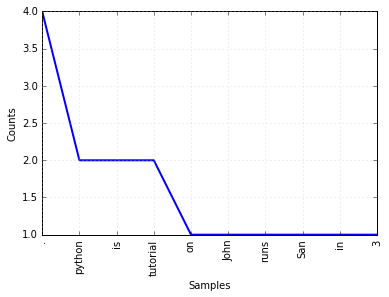

Text search
Displaying 2 of 2 matches:
                                    python tutorial . The tutorial runs NLTK o
                                    python 3 . John Smith currently lives in t


In [4]:
freq =nltk.FreqDist(token)
print(freq)
print('')


commonlist = freq.most_common(10)
commonlist = freq.most_common(10)
print("Most common words")
print(commonlist)
print('')

freq.plot(10)

#Search text
print("Text search")
token.concordance('python')

<h1>Part of Speech Tagger</h1>

In [5]:
from nltk.tag.stanford import StanfordTagger

tagged = [nltk.pos_tag(sent) for sent in tsentence]

print ('tokenized')
for i, sent in enumerate(tsentence[0:]):
    print (i, sent)
    print(" ")
    
    
print ('POS Tagged')

for i, sent in enumerate(tagged[0:]):
    print (i, tagged[i])
    print (" ")



tokenized
0 ['San', 'Francisco', 'is', 'foggy', '.']
 
1 ['This', 'is', 'a', 'python', 'tutorial', '.']
 
2 ['The', 'tutorial', 'runs', 'NLTK', 'on', 'python', '3', '.']
 
3 ['John', 'Smith', 'currently', 'lives', 'in', 'the', 'United', 'States', '.']
 
POS Tagged
0 [('San', 'NNP'), ('Francisco', 'NNP'), ('is', 'VBZ'), ('foggy', 'JJ'), ('.', '.')]
 
1 [('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('python', 'JJ'), ('tutorial', 'NN'), ('.', '.')]
 
2 [('The', 'DT'), ('tutorial', 'JJ'), ('runs', 'NNS'), ('NLTK', 'NNP'), ('on', 'IN'), ('python', 'NN'), ('3', 'CD'), ('.', '.')]
 
3 [('John', 'NNP'), ('Smith', 'NNP'), ('currently', 'RB'), ('lives', 'VBZ'), ('in', 'IN'), ('the', 'DT'), ('United', 'NNP'), ('States', 'NNPS'), ('.', '.')]
 


 <h1>Information Extraction</h1>

In [8]:
NEchunks =  list(nltk.ne_chunk_sents(tagged))

print ('Named Entity Recognition')
    
for i, sent in enumerate(NEchunks[0:]):
    print (i, NEchunks[i])
    print (" ")

    



Named Entity Recognition
0 (S (GPE San/NNP) (PERSON Francisco/NNP) is/VBZ foggy/JJ ./.)
 
1 (S This/DT is/VBZ a/DT python/JJ tutorial/NN ./.)
 
2 (S
  The/DT
  tutorial/JJ
  runs/NNS
  (ORGANIZATION NLTK/NNP)
  on/IN
  python/NN
  3/CD
  ./.)
 
3 (S
  (PERSON John/NNP)
  (PERSON Smith/NNP)
  currently/RB
  lives/VBZ
  in/IN
  the/DT
  (GPE United/NNP States/NNPS)
  ./.)
 


<h1>Lemmatization</h1>

In [9]:
from nltk.stem.wordnet import WordNetLemmatizer

lmtzr = WordNetLemmatizer()
lemmaset = [lmtzr.lemmatize(w) for w in token]


print("Lemmatized Set")
print(lemmaset)

Lemmatized Set
['San', 'Francisco', 'is', 'foggy', '.', 'This', 'is', 'a', 'python', 'tutorial', '.', 'The', 'tutorial', 'run', 'NLTK', 'on', 'python', '3', '.', 'John', 'Smith', 'currently', 'life', 'in', 'the', 'United', 'States', '.']


 <h1>Filtering </h1>

In [10]:
from nltk.corpus import stopwords

stopset = set(stopwords.words('english')).union(string.punctuation)
filtered_words = [w for w in lemmaset if w.lower() not in stopset]

print('Removed Stop words')
print(filtered_words)


Removed Stop words
['San', 'Francisco', 'foggy', 'python', 'tutorial', 'tutorial', 'run', 'NLTK', 'python', '3', 'John', 'Smith', 'currently', 'life', 'United', 'States']
